In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import classificacao

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
df_conhecimento = pd.read_csv('conhecimento.csv')
print(df_conhecimento.shape)

id_cena = np.random.choice(df_conhecimento.id_cena, 1, replace=False)[0]
teste_original = df_conhecimento[df_conhecimento.id_cena==id_cena].copy().reset_index(drop=True)
teste = teste_original.copy()
teste['verifica'] = 0
print(len(teste_original))

# Modelo
modelo_inteiro = df_conhecimento[~(df_conhecimento.id_cena==id_cena)].copy()

modelo_inteiro_1 = modelo_inteiro[modelo_inteiro.verifica==1].copy()
modelo_inteiro_3_full = modelo_inteiro[modelo_inteiro.verifica==3].copy()

id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]

modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

print(len(modelo))
print(modelo.verifica.value_counts())

(388551, 14)
7645
219142
3    109571
1    109571
Name: verifica, dtype: int64


In [4]:
colunas_stats = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [5]:
y_pred = classificacao.classifica(modelo, teste, colunas_stats)
y_true = teste_original.sort_values('id').reset_index(drop=True)

Criando classificador RF
RF - Classifica dado usando as colunas ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']
Classificando com NN
Cria avaliacao usando (RF+NN)/2 - Arredondado para 3 casas decimais


Confusion matrix, without normalization
[[2914  699]
 [   0 4032]]
Normalized confusion matrix
[[0.80653197 0.19346803]
 [0.         1.        ]]


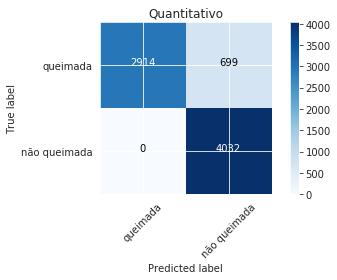

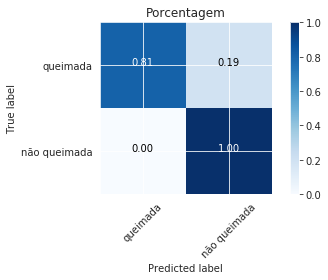

Acertos: 6946/7645 (90%)
LS82210742016283


In [6]:
classificacao.mostra_resultado(y_pred, y_true)
print(id_cena)